In [1]:
import optuna

from KNNClassifier import KNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [2]:
# in case of running the program on a remote server after converting it to .py
is_jupyter = DatasetRun.is_jupyter()

study_name = "dataset2_with_kmeans"
device = DatasetRun.get_device()

Device used: cuda


Sample run

In [3]:
if is_jupyter:
    metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=2.2, gamma_2=2.2, normalization=True)
    kmeans = KMeans(n_clusters=1, max_iter=300, metric=Metrics.EuclideanMetric())
    clf = KNNClassifier(n_neighbors=1, metric=metric, tukey_lambda=0.4, kmeans=kmeans, device=device)
    _ = DatasetRun.train(clf=clf, folder_name='./data/tasks2', n_tasks=6, only_last=False, verbose=True)

task 0: (time: 3.899)
Paper accuracy: 83.560; My accuracy: 83.640
task 1: (time: 3.460)
Paper accuracy: 76.517; My accuracy: 76.117
task 2: (time: 3.965)
Paper accuracy: 72.129; My accuracy: 71.657
task 3: (time: 4.274)
Paper accuracy: 67.662; My accuracy: 67.275
task 4: (time: 4.877)
Paper accuracy: 64.533; My accuracy: 64.033
task 5: (time: 5.345)
Paper accuracy: 62.280; My accuracy: 62.310


## Grid search

In [4]:
def objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 250)
    n_neighbors = trial.suggest_int('n_neighbors', 1, min(50, n_clusters))
    gamma_1 = trial.suggest_float('gamma_1', 0.001, 7., log=True)
    gamma_2 = trial.suggest_float('gamma_2', 0.001, 7., log=True)
    tukey_lambda = trial.suggest_float('lambda', 0.001, 3., log=True)
    
    metric = Metrics.MahalanobisMetric(shrinkage=True, gamma_1=gamma_1, gamma_2=gamma_2, normalization=True)
    kmeans = KMeans(n_clusters=n_clusters)
    clf = KNNClassifier(n_neighbors=n_neighbors, metric=metric, tukey_lambda=tukey_lambda, kmeans=kmeans, device=device)
    accuracy = DatasetRun.train(clf=clf, folder_name='./data/tasks2', n_tasks=6, only_last=True, verbose=False)
    
    return accuracy

DatasetRun.grid_search(objective=objective, 
                       study_name=study_name, 
                       n_trials=10, 
                       sampler=optuna.samplers.RandomSampler(),
                       restart=False, 
                       n_jobs=1, 
                       verbose=4)
DatasetRun.save_to_csv(study_name)

[I 2024-09-25 00:42:04,711] Using an existing study with name 'dataset2_with_kmeans' instead of creating a new one.
[I 2024-09-25 00:43:40,392] Trial 15 finished with value: 59.74 and parameters: {'n_clusters': 187, 'n_neighbors': 11, 'gamma_1': 4.439502627167544, 'gamma_2': 0.20803810160677041, 'lambda': 0.4620223545018782}. Best is trial 15 with value: 59.74.
[I 2024-09-25 00:44:59,542] Trial 16 finished with value: 51.82 and parameters: {'n_clusters': 149, 'n_neighbors': 20, 'gamma_1': 0.05606848224314009, 'gamma_2': 0.032201316248679314, 'lambda': 0.5409654597277914}. Best is trial 15 with value: 59.74.
[I 2024-09-25 00:45:18,295] Trial 17 finished with value: 1.1199999999999999 and parameters: {'n_clusters': 44, 'n_neighbors': 43, 'gamma_1': 0.05391895065425384, 'gamma_2': 2.4590227758161642, 'lambda': 0.003756009321171762}. Best is trial 15 with value: 59.74.
[I 2024-09-25 00:46:34,415] Trial 18 finished with value: 1.0 and parameters: {'n_clusters': 150, 'n_neighbors': 26, 'gamm

Best hyperparameters:  {'n_clusters': 199, 'n_neighbors': 32, 'gamma_1': 1.745282555614366, 'gamma_2': 0.003821325171668415, 'lambda': 0.1328527667756814}
Best accuracy:  59.86


plot accuracy over trials (to check how well did the grid search work)

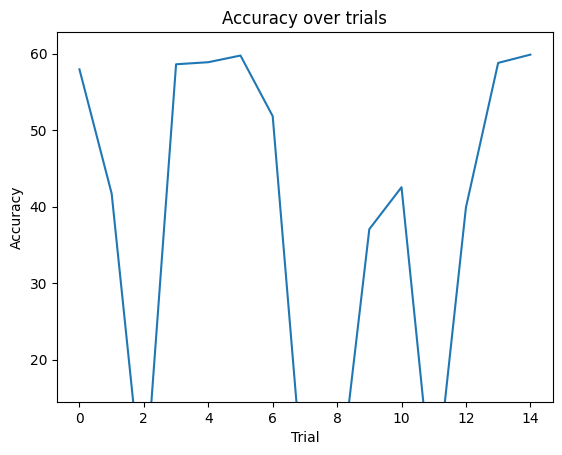

In [5]:
if is_jupyter:
    DatasetRun.plot_accuracy_trials(study_name=study_name, ylim=True)

plot accuracies against hyperparameters' values 

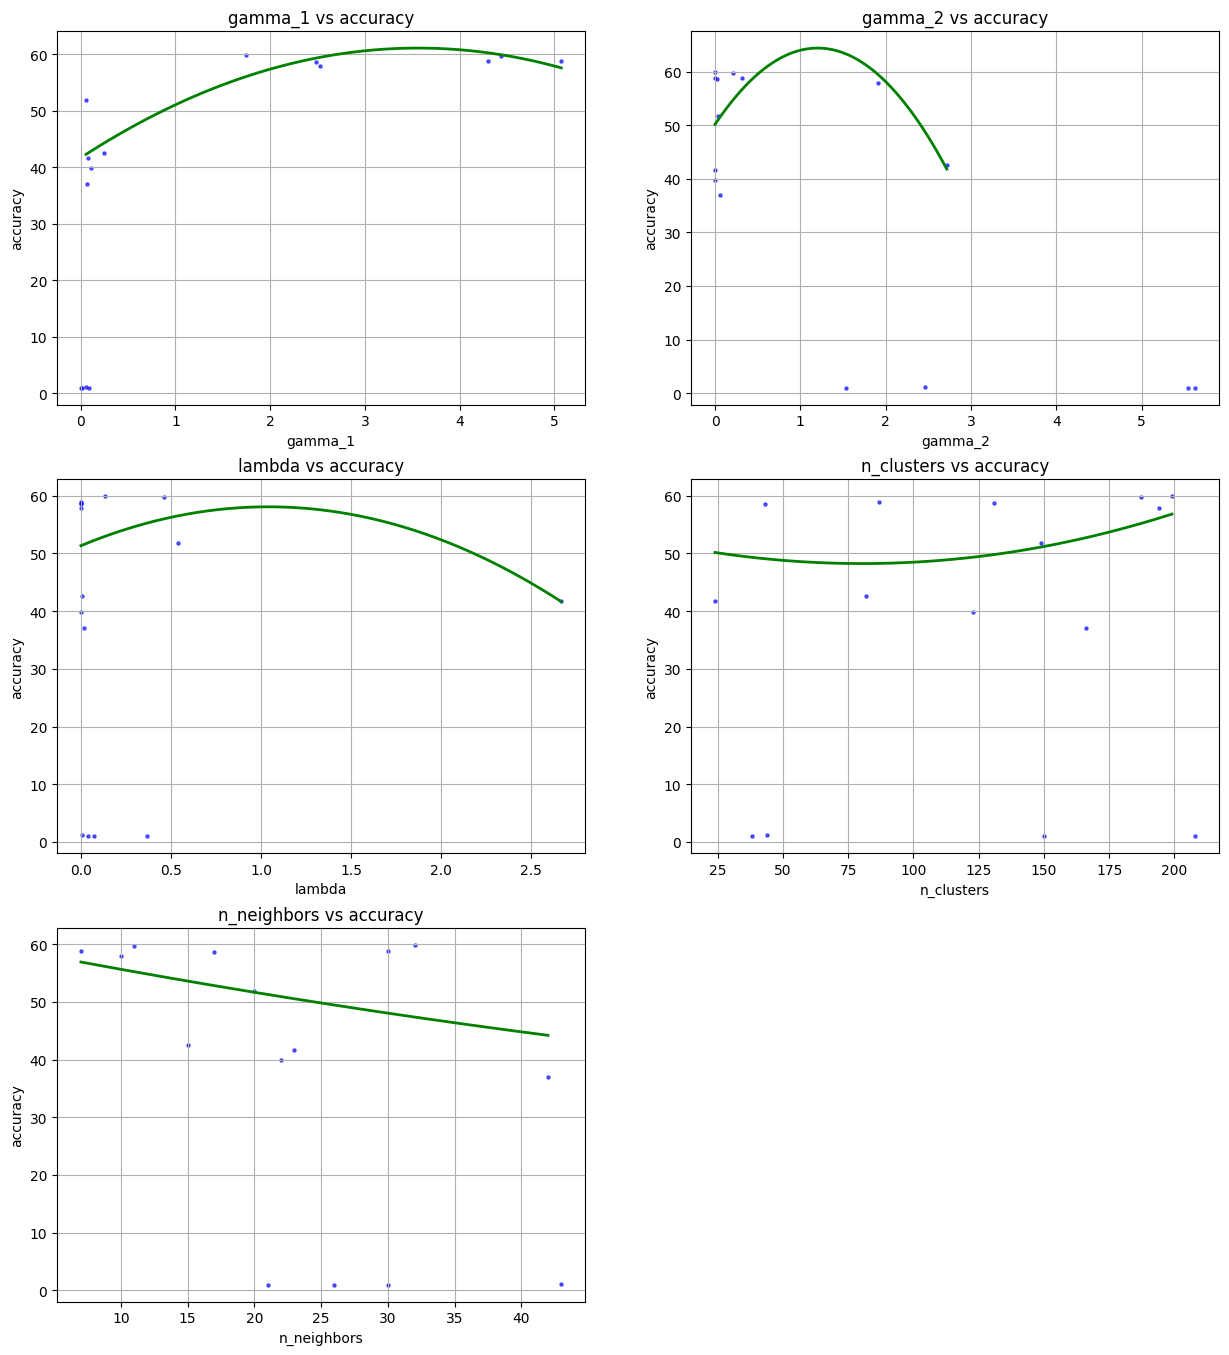

In [6]:
if is_jupyter:
    DatasetRun.plot_hyperparameters(study_name, columns=2, deg=2, ylim=True)

In [7]:
if is_jupyter:
    display(DatasetRun.print_results(study_name, only_important=True))

,value,gamma_1,gamma_2,lambda,n_clusters,n_neighbors
14,59.86,1.745283,0.003821,0.132853,199,32
5,59.74,4.439503,0.208038,0.462022,187,11
4,58.87,4.303139,0.000790,0.000115,87,7
13,58.78,5.072438,0.321456,0.002444,131,30
3,58.60,2.483632,0.021043,0.000189,43,17
0,57.94,2.524881,1.911791,0.000146,194,10
6,51.82,0.056068,0.032201,0.540965,149,20
10,42.53,0.249565,2.716928,0.008023,82,15
1,41.70,0.072474,0.000110,2.666774,24,23
12,39.88,0.104458,0.001034,0.001186,123,22
